In [73]:
import json
import jiwer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge import Rouge
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

In [74]:
# Función auxiliar para asegurarse de que siempre se obtiene una lista de tokens
def safe_split(x):
    if isinstance(x, str):
        tokens = x.split()
        return tokens if tokens else ["<EMPTY>"]
    return x

# Función para calcular el Token Error Rate (Word Error Rate)
def compute_token_error_rate(reference, hypothesis):
    # Componer la transformación para normalizar ambos textos
    transformation = jiwer.Compose([
        jiwer.ExpandCommonEnglishContractions(),
        jiwer.RemoveEmptyStrings(),
        jiwer.ToLowerCase(),
        jiwer.RemoveMultipleSpaces(),
        jiwer.Strip(),
        jiwer.RemovePunctuation(),
        jiwer.ReduceToListOfListOfWords()
    ])
    # Calcula el Word Error Rate
    error_rate = jiwer.wer(
        reference, 
        hypothesis, 
        truth_transform=transformation, 
        hypothesis_transform=transformation
    )
    return error_rate

# Función para calcular el BLEU
def compute_bleu(reference, hypothesis):
    ref_tokens = reference.split()
    hyp_tokens = hypothesis.split()
    smoothie = SmoothingFunction().method4
    bleu_score = sentence_bleu([ref_tokens], hyp_tokens, smoothing_function=smoothie)
    return bleu_score

# Función para calcular ROUGE-L
def compute_rouge(reference, hypothesis):
    rouge_evaluator = Rouge()
    scores = rouge_evaluator.get_scores(hypothesis, reference)
    rouge_l = scores[0]['rouge-l']['f']
    return rouge_l

# Función para calcular las métricas para cada respuesta
def calculate_metrics(results):
    for result in results:
        expected = result["expected_answer"].strip()
        generated = result["generated_answer"].strip()
        
        result["token_error_rate"] = compute_token_error_rate(expected, generated)
        result["bleu_score"] = compute_bleu(expected, generated)
        try:
            result["rouge_l"] = compute_rouge(expected, generated)
        except Exception as e:
            result["rouge_l"] = None
            print(f"Error al calcular ROUGE: {e}")
    return results

In [75]:
# Abrir los archivos JSON con los resultados
with open("non_expert_results_basic.json", "r", encoding="utf-8") as f:
    non_expert_results = json.load(f)

with open("expert_answers_basic.json", "r", encoding="utf-8") as f:
    expert_results = json.load(f)

In [76]:
# Calcular métricas para cada conjunto
non_expert_results = calculate_metrics(non_expert_results)
expert_results = calculate_metrics(expert_results)

In [77]:
# Imprimir resultados para verificación
print("Resultados para preguntas no expertas con métricas:")
for res in non_expert_results:
    print(res)
    
print("\nResultados para preguntas expertas con métricas:")
for res in expert_results:
    print(res)

Resultados para preguntas no expertas con métricas:
{'question': 'What are ESG risks?', 'expected_answer': 'Risks related to environmental, social, and governance factors that can affect the stability and functioning of financial institutions, including transition risks towards sustainable economies and physical risks (such as extreme climate events).', 'generated_answer': 'Based on the context provided, ESG risks refer to:\n\nEnvironmental, Social, and Governance risks that can impact financial institutions. Specifically:\n\n1. ESG risks are potential drivers of traditional financial risk categories like credit risk, market risk, operational risk, reputational risk, liquidity risk, business model risk, and concentration risk.\n\n2. They can have short-term, medium-term and long-term impacts on financial institutions.\n\n3. ESG risks include', 'token_error_rate': 1.65625, 'bleu_score': 0.015431933558762781, 'rouge_l': 0.15999999525688902}
{'question': 'What is the main objective of the

In [78]:
# Guardar los resultados enriquecidos en nuevos archivos JSON
with open("nonExpert_answers_basic.json", "w", encoding="utf-8") as f:
    json.dump(non_expert_results, f, ensure_ascii=False, indent=4)

with open("expert_results_basic.json", "w", encoding="utf-8") as f:
    json.dump(expert_results, f, ensure_ascii=False, indent=4)


In [79]:
# Abrir los archivos JSON con los resultados
with open("nonExpert_answers_advanced.json", "r", encoding="utf-8") as f:
    non_expert_results_advanced = json.load(f)

with open("expert_answers_advanced.json", "r", encoding="utf-8") as f:
    expert_results_advanced = json.load(f)


In [80]:
# Calcular métricas para cada conjunto
non_expert_results_advanced = calculate_metrics(non_expert_results_advanced)
expert_results_advanced = calculate_metrics(expert_results_advanced)
# Imprimir resultados para verificación
print("Resultados avanzados para preguntas no expertas con métricas:")
for res in non_expert_results_advanced:
    print(res)

print("\nResultados avanzados para preguntas expertas con métricas:")
for res in expert_results_advanced:
    print(res)


Resultados avanzados para preguntas no expertas con métricas:
{'question': 'What are ESG risks?', 'expected_answer': 'Risks related to environmental, social, and governance factors that can affect the stability and functioning of financial institutions, including transition risks towards sustainable economies and physical risks (such as extreme climate events).', 'generated_answer': 'ESG risks are environmental, social, and governance risks.', 'token_error_rate': 0.84375, 'bleu_score': 0.018199922872487343, 'rouge_l': 0.27777777464506176}
{'question': 'What is the main objective of these ESG guidelines?', 'expected_answer': 'To establish minimum standards and reference methodologies for identifying, measuring, managing, and monitoring ESG risks in institutions.', 'generated_answer': 'The main objective of these ESG guidelines is to enhance the identification, measurement, management and monitoring of ESG risks by financial institutions.', 'token_error_rate': 1.0, 'bleu_score': 0.040615

In [81]:
# Abrir los archivos JSON con los resultados
with open("nonExpert_answers_langchain.json", "r", encoding="utf-8") as f:
    non_expert_results_langchain = json.load(f)

with open("expert_answers_langchain.json", "r", encoding="utf-8") as f:
    expert_results_langchain = json.load(f)

In [82]:
# Calcular métricas para cada conjunto
non_expert_results_langchain = calculate_metrics(non_expert_results_langchain)
expert_results_langchain = calculate_metrics(expert_results_langchain)
# Imprimir resultados para verificación
print("Resultados avanzados para preguntas no expertas con métricas:")
for res in non_expert_results_langchain:
    print(res)

print("\nResultados avanzados para preguntas expertas con métricas:")
for res in expert_results_langchain:
    print(res)

Resultados avanzados para preguntas no expertas con métricas:
{'question': 'What are ESG risks?', 'expected_answer': 'Risks related to environmental, social, and governance factors that can affect the stability and functioning of financial institutions, including transition risks towards sustainable economies and physical risks (such as extreme climate events).', 'generated_answer': 'ESG risks are environmental, social and governance risks that can impact the safety and soundness of financial institutions in the short, medium and long term as a result of the effects of environmental, social and governance factors.', 'token_error_rate': 0.8125, 'bleu_score': 0.03558808868258459, 'rouge_l': 0.32727272228760335}
{'question': 'What is the main objective of these ESG guidelines?', 'expected_answer': 'To establish minimum standards and reference methodologies for identifying, measuring, managing, and monitoring ESG risks in institutions.', 'generated_answer': 'The main objective of these ESG

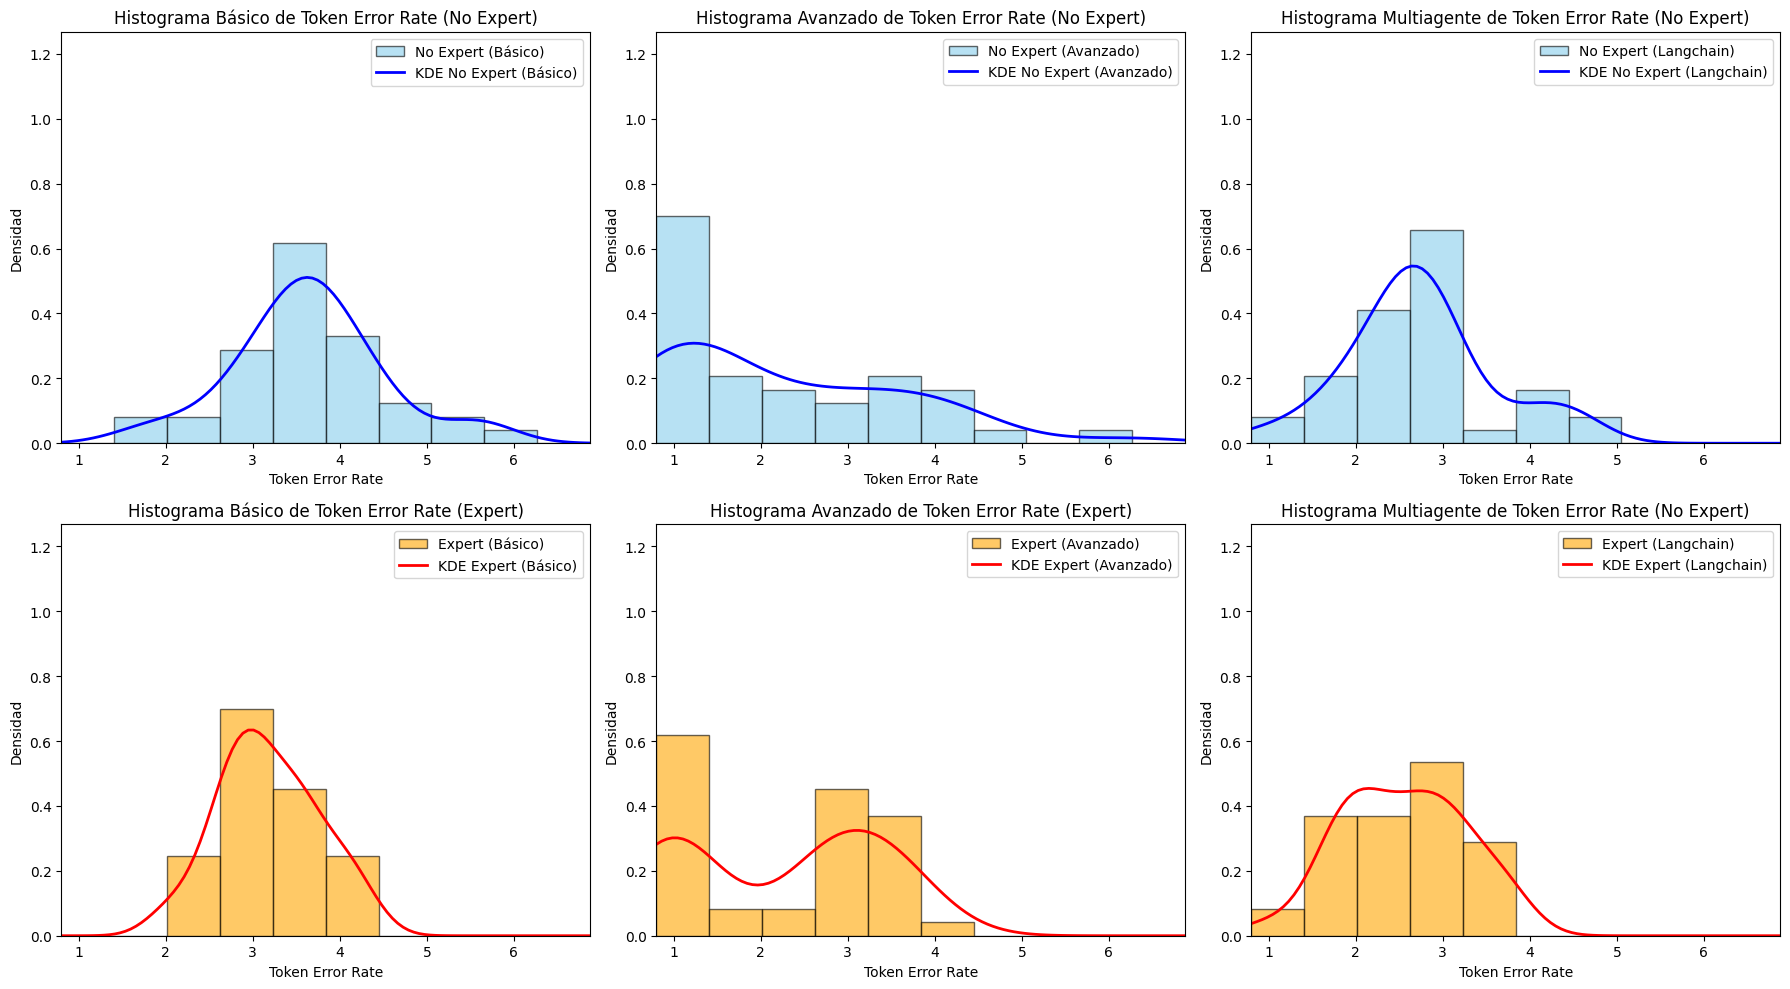

In [83]:
# Extraer token_error_rate para cada conjunto
non_expert_error_rates_basic    = [result['token_error_rate'] for result in non_expert_results]
expert_error_rates_basic        = [result['token_error_rate'] for result in expert_results]
non_expert_error_rates_advanced  = [result['token_error_rate'] for result in non_expert_results_advanced]
expert_error_rates_advanced      = [result['token_error_rate'] for result in expert_results_advanced]
non_expert_error_rates_langchain  = [result['token_error_rate'] for result in non_expert_results_langchain]
expert_error_rates_langchain      = [result['token_error_rate'] for result in expert_results_langchain]

# Calcular límites globales en el eje X a partir de todos los conjuntos
x_min = min(min(non_expert_error_rates_basic), min(expert_error_rates_basic),
            min(non_expert_error_rates_advanced), min(expert_error_rates_advanced), 
            min(non_expert_error_rates_langchain), min(expert_error_rates_langchain))
x_max = max(max(non_expert_error_rates_basic), max(expert_error_rates_basic),
            max(non_expert_error_rates_advanced), max(expert_error_rates_advanced),
            max(non_expert_error_rates_langchain), max(expert_error_rates_langchain)) * 1.1

# Definir bins y dominio para las curvas KDE de forma global
bins = np.linspace(x_min, x_max, 11)
x_vals_global = np.linspace(x_min, x_max, 100)

# Calcular las curvas KDE para cada conjunto usando el dominio global
kde_basic_non_expert = gaussian_kde(non_expert_error_rates_basic)
y_basic_non_expert = kde_basic_non_expert(x_vals_global)

kde_adv_non_expert = gaussian_kde(non_expert_error_rates_advanced)
y_adv_non_expert = kde_adv_non_expert(x_vals_global)

kde_basic_expert = gaussian_kde(expert_error_rates_basic)
y_basic_expert = kde_basic_expert(x_vals_global)

kde_adv_expert = gaussian_kde(expert_error_rates_advanced)
y_adv_expert = kde_adv_expert(x_vals_global)

kde_langchain_expert = gaussian_kde(expert_error_rates_langchain)
y_langchain_expert = kde_langchain_expert(x_vals_global)

kde_langchain_non_expert = gaussian_kde(non_expert_error_rates_langchain)
y_langchain_non_expert = kde_langchain_non_expert(x_vals_global)

# Calcular el máximo global del eje Y a partir de las curvas KDE
global_y_max = max(y_basic_non_expert.max(), y_adv_non_expert.max(),
                   y_basic_expert.max(), y_adv_expert.max(),
                   y_langchain_expert.max(), y_langchain_non_expert.max()) * 2  # margen del 10%

# Crear una figura con una cuadrícula de 2x2
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Histograma básico de preguntas no expertas (arriba izquierda)
ax = axes[0, 0]
ax.hist(non_expert_error_rates_basic, bins=bins, density=True, 
        alpha=0.6, color='skyblue', edgecolor='black', label='No Expert (Básico)')
ax.plot(x_vals_global, y_basic_non_expert, color='blue', linewidth=2, label='KDE No Expert (Básico)')
ax.set_title("Histograma Básico de Token Error Rate (No Expert)")
ax.set_xlabel("Token Error Rate")
ax.set_ylabel("Densidad")
ax.set_xlim(x_min, x_max)
ax.set_ylim(0, global_y_max)
ax.legend()

# Histograma avanzado de preguntas no expertas (arriba derecha)
ax = axes[0, 1]
ax.hist(non_expert_error_rates_advanced, bins=bins, density=True, 
        alpha=0.6, color='skyblue', edgecolor='black', label='No Expert (Avanzado)')
ax.plot(x_vals_global, y_adv_non_expert, color='blue', linewidth=2, label='KDE No Expert (Avanzado)')
ax.set_title("Histograma Avanzado de Token Error Rate (No Expert)")
ax.set_xlabel("Token Error Rate")
ax.set_ylabel("Densidad")
ax.set_xlim(x_min, x_max)
ax.set_ylim(0, global_y_max)
ax.legend()

# Histograma avanzado de preguntas no expertas (arriba derecha)
ax = axes[0, 2]
ax.hist(non_expert_error_rates_langchain, bins=bins, density=True, 
        alpha=0.6, color='skyblue', edgecolor='black', label='No Expert (Langchain)')
ax.plot(x_vals_global, y_langchain_non_expert, color='blue', linewidth=2, label='KDE No Expert (Langchain)')
ax.set_title("Histograma Multiagente de Token Error Rate (No Expert)")
ax.set_xlabel("Token Error Rate")
ax.set_ylabel("Densidad")
ax.set_xlim(x_min, x_max)
ax.set_ylim(0, global_y_max)
ax.legend()

# Histograma básico de preguntas expertas (abajo izquierda)
ax = axes[1, 0]
ax.hist(expert_error_rates_basic, bins=bins, density=True, 
        alpha=0.6, color='orange', edgecolor='black', label='Expert (Básico)')
ax.plot(x_vals_global, y_basic_expert, color='red', linewidth=2, label='KDE Expert (Básico)')
ax.set_title("Histograma Básico de Token Error Rate (Expert)")
ax.set_xlabel("Token Error Rate")
ax.set_ylabel("Densidad")
ax.set_xlim(x_min, x_max)
ax.set_ylim(0, global_y_max)
ax.legend()

# Histograma avanzado de preguntas expertas (abajo derecha)
ax = axes[1, 1]
ax.hist(expert_error_rates_advanced, bins=bins, density=True, 
        alpha=0.6, color='orange', edgecolor='black', label='Expert (Avanzado)')
ax.plot(x_vals_global, y_adv_expert, color='red', linewidth=2, label='KDE Expert (Avanzado)')
ax.set_title("Histograma Avanzado de Token Error Rate (Expert)")
ax.set_xlabel("Token Error Rate")
ax.set_ylabel("Densidad")
ax.set_xlim(x_min, x_max)
ax.set_ylim(0, global_y_max)
ax.legend()

# Histograma avanzado de preguntas no expertas (arriba derecha)
ax = axes[1, 2]
ax.hist(expert_error_rates_langchain, bins=bins, density=True, 
        alpha=0.6, color='orange', edgecolor='black', label='Expert (Langchain)')
ax.plot(x_vals_global, y_langchain_expert, color='red', linewidth=2, label='KDE Expert (Langchain)')
ax.set_title("Histograma Multiagente de Token Error Rate (No Expert)")
ax.set_xlabel("Token Error Rate")
ax.set_ylabel("Densidad")
ax.set_xlim(x_min, x_max)
ax.set_ylim(0, global_y_max)
ax.legend()

plt.tight_layout()
plt.show()

In [84]:
# Guardar los resultados enriquecidos en nuevos archivos JSON
with open("nonExpert_results_basic.json", "w", encoding="utf-8") as f:
    json.dump(non_expert_results, f, ensure_ascii=False, indent=4)

with open("expert_answers_basic.json", "w", encoding="utf-8") as f:
    json.dump(expert_results, f, ensure_ascii=False, indent=4)

# Guardar los resultados enriquecidos en nuevos archivos JSON
with open("nonExpert_results_advanced.json", "w", encoding="utf-8") as f:
    json.dump(non_expert_results_advanced, f, ensure_ascii=False, indent=4)

with open("expert_results_advanced.json", "w", encoding="utf-8") as f:
    json.dump(expert_results_advanced, f, ensure_ascii=False, indent=4)
    
# Guardar los resultados enriquecidos en nuevos archivos JSON
with open("nonExpert_results_langchain.json", "w", encoding="utf-8") as f:
    json.dump(non_expert_results_langchain, f, ensure_ascii=False, indent=4)

with open("expert_results_langchain.json", "w", encoding="utf-8") as f:
    json.dump(expert_results_langchain, f, ensure_ascii=False, indent=4)